#Installing required libraries

In [ ]:
#Installing the required libraries

In [ ]:
pip install numpy


In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install pandas-datareader

In [ ]:
pip install tensorflow

In [ ]:
pip install scikit-learn

In [ ]:
pip install yfinance 

#Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential 

#Defining the currencies

In [ ]:
crypto_currency = 'ETH'
against_currency = 'INR'

start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()

data = yf.download(f'{crypto_currency}-{against_currency}', start, end)

#Prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60
#Predicting the 90th day
future_day = 30

x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)-future_day):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x+future_day, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



[*********************100%***********************]  1 of 1 completed


#Creating the Neaural Network

In [68]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
20/20 [==============================] - 7s 97ms/step - loss: 0.0305
Epoch 2/25
20/20 [==============================] - 2s 96ms/step - loss: 0.0147
Epoch 3/25
20/20 [==============================] - 2s 97ms/step - loss: 0.0123
Epoch 4/25
20/20 [==============================] - 2s 97ms/step - loss: 0.0097
Epoch 5/25
20/20 [==============================] - 2s 95ms/step - loss: 0.0120
Epoch 6/25
20/20 [==============================] - 2s 96ms/step - loss: 0.0114
Epoch 7/25
20/20 [==============================] - 2s 96ms/step - loss: 0.0111
Epoch 8/25
20/20 [==============================] - 2s 96ms/step - loss: 0.0114
Epoch 9/25
20/20 [==============================] - 2s 96ms/step - loss: 0.0096
Epoch 10/25
20/20 [==============================] - 2s 96ms/step - loss: 0.0084
Epoch 11/25
20/20 [==============================] - 2s 97ms/step - loss: 0.0082
Epoch 12/25
20/20 [==============================] - 2s 98ms/step - loss: 0.0088
Epoch 13/25
20/20 [==================

# Testing The Model


[*********************100%***********************]  1 of 1 completed


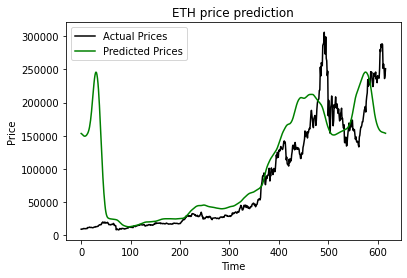

In [70]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()
test_data = yf.download(f'{crypto_currency}-{against_currency}', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

#Predict Next day

In [71]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1,0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

[[153286.73]]
